In [2]:
!pip install pulp

In [4]:
from pulp import *

In [5]:
pulp.LpVariable?

In [9]:
mi_lp_problema = pulp.LpProblem("Mi LP Problema", pulp.LpMinimize)

x = pulp.LpVariable('x', lowBound=0,cat='Continuous')
y = pulp.LpVariable('y', lowBound=0,cat='Continuous')

#ObjectiveFunction
mi_lp_problema += x + 2*y

#Constraints
mi_lp_problema += 3*x + 4*y >= 1
mi_lp_problema += 2*x + 5*y >= 2


mi_lp_problema

Mi_LP_Problema:
MINIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: 3 x + 4 y >= 1

_C2: 2 x + 5 y >= 2

VARIABLES
x Continuous
y Continuous

In [10]:
mi_lp_problema

Mi_LP_Problema:
MINIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: 3 x + 4 y >= 1

_C2: 2 x + 5 y >= 2

VARIABLES
x Continuous
y Continuous

In [11]:
mi_lp_problema.solve()

1

In [ ]:
for variable in mi:lp_problema.variables():
        print("{} = {}".format(variable.name))

In [12]:
!pip install cvxopt

In [17]:
from cvxopt import *

A= matrix([ [-3.0, -2.0, -1.0, 0.0],
            [-4.0, -5.0, 0.0, -1.0]])

b=matrix([-1.0, -2.0, 0.0, 0.0])
c=matrix([1.0, 2.0])
sol = solvers.lp(c,A,b)

print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  6.7308e-01  3.7308e+00  6e+00  1e+00  5e+00  1e+00
 1:  8.4233e-01  1.0964e+00  5e-01  1e-01  6e-01  6e-03
 2:  8.0538e-01  8.2298e-01  2e-02  8e-03  4e-02  2e-03
 3:  8.0005e-01  8.0026e-01  2e-04  1e-04  5e-04  3e-05
 4:  8.0000e-01  8.0000e-01  2e-06  1e-06  5e-06  3e-07
 5:  8.0000e-01  8.0000e-01  2e-08  1e-08  5e-08  3e-09
Optimal solution found.
[ 1.86e-08]
[ 4.00e-01]



In [19]:
""" 
minimize 2x1 + x2
subject to -x1+x2 <= 1
            x1 + x2 >= 2
            x2 >= 0
            x1 - 2x2 <= 4
"""
A= matrix([ [-1.0, -1.0, 0.0, 1.0],
            [1.0, -1.0, -1.0, -2.0]])

b=matrix([1.0, -2.0, 0.0, 4.0])
c=matrix([2.0, 1.0])
sol = solvers.lp(c,A,b)

print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.
[ 5.00e-01]
[ 1.50e+00]



In [20]:
from scipy.optimize import linprog

In [24]:
""" 
minimize 2x1 + x2
subject to -x1+x2 <= 1
            x1 + x2 >= 2
            x2 >= 0
            x1 - 2x2 <= 4
"""

c = [2,1]

A = [[-1,1],
     [-1,-1],
     [1,-2]]

b= [1, -2 ,4]
 
x0_bounds= (0, None)
x1_bounds= (0, None)

res = linprog(c, A_ub=A,b_ub=b,bounds=(x0_bounds,x1_bounds), options={"disp":True})

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 3.0                 
0.2072856751293     0.2072856751293     0.2072856751293     0.7999480594121  0.2072856751293     3.579699344878      
0.04221733741717    0.04221733741733    0.04221733741733    0.8110397766462  0.04221733741734    2.932391084387      
0.002794365888754   0.002794365888752   0.002794365888752   0.9398089815588  0.002794365888663   2.499086690604      
1.55017789994e-06   1.55017790417e-06   1.550177904208e-06  1.0              1.550177904493e-06  2.500010071106      
7.75087706436e-11   7.750910491569e-11  7.750905473003e-11  0.9999499998918  7.750902688112e-11  2.500000000504      
Optimization terminated successfully.
         Current function value: 2.500000    
         Iterations: 5


In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

Text(0.5, 0, 'tiempo')

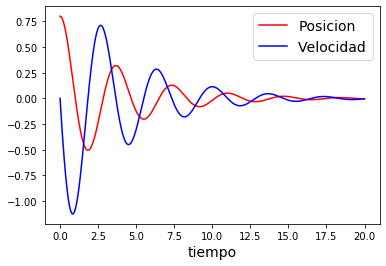

In [39]:
k = 3.0 # constante del resorte
m = 1.0
B = 0.5 #Constante de amortiguacion
def armonico(variables, t):
    x,y = variables
    return [y, -k*x/m-B/m*y]

inicial = [0.8,0]#vector de posicion inicial y velocidad inicial
# condiciones iniciales x(t=0)=0.8[m] y(t=0)=0.0 [m/s]

tiempo = np.arange(0,20,0.01)

resultado=odeint(armonico,inicial,tiempo)
#el sistema se resuelve con
#odeint(sistema, conidciones iniciales, rangodnde graficaremos)
xx, yy = resultado.T #extrae posicion y velocidad
plt.plot(tiempo,xx,c='r', label='Posicion')
plt.plot(tiempo,yy,c='b', label='Velocidad')
plt.legend(loc= 'best',prop={'size':14})
plt.xlabel('tiempo', fontsize=14)



In [46]:
Omega=k/m
Omega

3.0

In [48]:
from ipywidgets import *

In [59]:
def amortiguado(k=1,m=4.1, B=0.5):
    #k = 3.0 # constante del resorte
    #m = 1.0
    #B = 0.5 #Constante de amortiguacion
    def armonico(variables, t):
        x,y = variables
        return [y, -k*x/m-B/m*y]

    inicial = [0.8,0]#vector de posicion inicial y velocidad inicial
    # condiciones iniciales x(t=0)=0.8[m] y(t=0)=0.0 [m/s]

    tiempo = np.arange(0,20,0.01)

    resultado=odeint(armonico,inicial,tiempo)
    #el sistema se resuelve con
    #odeint(sistema, conidciones iniciales, rangodnde graficaremos)
    xx, yy = resultado.T #extrae posicion y velocidad
    plt.plot(tiempo,xx,c='r', label='Posicion')
    plt.plot(tiempo,yy,c='b', label='Velocidad')
    plt.legend(loc= 'best',prop={'size':14})
    plt.xlabel('tiempo', fontsize=14)
    plt.show()

interact_manual(amortiguado, k=(0,10,0.1),m=(0,10,0.1), B=(0,10,0.1))


interactive(children=(FloatSlider(value=1.0, description='k', max=10.0), FloatSlider(value=4.1, description='m…

<function __main__.amortiguado(k=1, m=4.1, B=0.5)>

In [67]:
def crecimiento(r=1):
    def poblacion(variables, t):
        return r*x*(1-x)

    inicial = 0.05

    tiempo = np.linspace(0,10)

    xx=odeint(poblacion,inicial,tiempo)
    
    plt.plot(tiempo,xx,c='r', label='Posicion')

    plt.legend(loc= 'best',prop={'size':14})
    plt.xlabel('tiempo', fontsize=14)
    plt.show()

interact_manual(crecimiento, r=(0,10,0.1))


interactive(children=(FloatSlider(value=1.0, description='r', max=10.0), Button(description='Run Interact', st…

<function __main__.crecimiento(r=1)>

In [94]:
#controlar un robot
def trayectoria(R=0.5,L=1,Vr=1,Vl=1):
    def sistema(variables, t):
        x,y,phi= variables
        return [(R/2)*(Vr+Vl)*np.cos(phi),(R/2)*(Vr+Vl)*np.sin(phi), R/L * (Vr-Vl) ]

    inicial = [0,0,0]

    tiempo = np.arange(0,5,0.01)

    resultado=odeint(sistema,inicial,tiempo)

    xx, yy = resultado[:,0],resultado[:,1] 
    plt.plot(xx,yy,c='r')
    plt.show()


interact_manual(trayectoria, R=(0,5,0.1), L=(0,5,0.1), Vr=(0,5,0.1), Vl=(0,5,0.1))
#webots


interactive(children=(FloatSlider(value=0.5, description='R', max=5.0), FloatSlider(value=1.0, description='L'…

<function __main__.trayectoria(R=0.5, L=1, Vr=1, Vl=1)>